<a href="https://colab.research.google.com/github/Fernanda101704/Redes_Neurais_2021/blob/main/Projeto_1_RN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
# Projeto 1: Disciplina de Redes Neurais - UFU
# Professor: Ubirajara Coutinho Filho
# Tema: Modelagem de Rede Neural Artificial para Adsorção de Corantes de solução aquosa usando carbono de casca de arroz (artigo)
# Autores do artigo: R. D. Khonde e S. L. Pandharipande
# Aluna: Fernanda Silva Pimenta
# Data: 12/05/2021
#
# Inicialmente é necessário definir as bibliotecas que serão utilizadas para a execução do código corretamente:
import numpy as np
# numpy é a biblioteca numérica do Phyton e no código ela é denominada de np
import pandas as pd
# pandas é a biblioteca responsável pela manipulação de arquivos e no código ela é denominada de pd
import matplotlib.pyplot as plt
# matplotlib.pyplot é a biblioteca usada para fazer gráficos no Phyton e permite fazer as configurações do gráfico, como cor, formato, etc
from sklearn.neural_network import MLPRegressor
# sklearn.neural_network é a biblioteca usada para fazer classificação e regressão, neste caso, ela faz a regressão (MLPRegressor) pois, as variáveis avaliadas no artigo são contínuas
from sklearn.metrics import mean_squared_error
# Essa biblioteca é usada para fazer a soma dos quadrados dos desvios
from sklearn.metrics import r2_score 
# Essa biblioteca foi criada para avaliar se o ajuste está bom através do coeficiente de determinação, visto que quanto mais próximo de 1 (geralmente) melhor é o ajuste



In [66]:
print("Você sabe o que é adsorção? A adsorção é um dos processos industriais mais importantes usados para remoção de cor, odor, turbidez e redução de DQO de alguns materiais. Você já ouviu falar sobre a adsorção usando a casca de arroz?")
print("Não perca tempo e venha aprender sobre esse assunto com o código abaixo! Você não vai se arrepender ;)")

Você sabe o que é adsorção? A adsorção é um dos processos industriais mais importantes usados para remoção de cor, odor, turbidez e redução de DQO de alguns materiais. Você já ouviu falar sobre a adsorção usando a casca de arroz?
Não perca tempo e venha aprender sobre esse assunto com o código abaixo! Você não vai se arrepender ;)


In [67]:
print('Os dados apresentados na tabela csv foram extraídos do artigo estudado, no qual Abs = tipo de adsorvato; IC = Concentração inicial' )
print('AA= quantidade de adsorvente; AD = quantidade de adsorvato adsorvido por unidade de adsorvente; PRA = porcentagem de adsorção experimental')
print('MDL = porcentagem de adsorção predita')

Os dados apresentados na tabela csv foram extraídos do artigo estudado, no qual Abs = tipo de adsorvato; IC = Concentração inicial
AA= quantidade de adsorvente; AD = quantidade de adsorvato adsorvido por unidade de adsorvente; PRA = porcentagem de adsorção experimental
MDL = porcentagem de adsorção predita


In [68]:
%matplotlib inline
# Esse comando indica a construção de gráficos no browser entretanto, mesmo sem essa linha o Phyton geraria o gráfico normalmente
# Usa-se o % quando os comandos não são necessariamente do Phyton, sendo necessário indicar dessa forma

In [69]:
!git clone https://github.com/Fernanda101704/Redes_Neurais_2021
%cd Redes_Neurais_2021
# Esse comando é usado para criar uma cópia de um repositório ou parte específica dentro de um repositório, nesse caso foi criado uma cópia da pasta Redes_Neurais_2021

Cloning into 'Redes_Neurais_2021'...
remote: Enumerating objects: 55, done.
remote: Counting objects: 100% (55/55), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 55 (delta 26), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (55/55), done.
/content/Redes_Neurais_2021/Redes_Neurais_2021


In [70]:
# Leitura dos dados do artigo através de uma planilha do Excel
# Vale ressaltar que, deve-se inserir a planilha de dados no Github, de modo que o arquivo esteja salvo no formato csv (comma separated values)
# O formato csv contribui para que os dados não sejam corrompidos e possam ser lidos com facilidade no Phyton  
# Nesse caso, foi utilizado o delimiter para arrumar a planilha de dados para as colunas não ficarem separadas pelo ';'
# A separação das colunas por ; prejudica a separação dos dados e a execução dos demais comandos do código
df=pd.read_csv("Dados totais.csv",delimiter=';')
print(df.head(22))
# O comando print faz a impressão na tela das 22 linhas da tabela e todas as colunas

    Abs    IC    AA      AD     PRA     MDL    Tipo
0    30  1000   8.0  11.562   92.50  90.389   teste
1    60   100   8.0   1.224   97.92  97.909   teste
2    80   500   2.5  19.875   99.38  99.929   teste
3    90   500   1.5  33.021   99.06  99.892   teste
4    30  1000   2.0  39.000   78.00  77.534  treino
5    30  1000   4.0  21.500   86.00  87.845  treino
6    30  1000   6.0  14.916   89.50  88.679  treino
7    30  1000  10.0   9.375   93.75  93.050  treino
8    60   100   2.0   3.850   77.00  76.971  treino
9    60   100   4.0   2.188   87.50  88.442  treino
10   60   100   6.0   1.576   94.58  95.991  treino
11   60   100  10.0   0.988   98.75  98.133  treino
12   80   500   0.5  98.750   98.75  97.930  treino
13   80   500   1.0  49.583   99.17  99.677  treino
14   80   500   1.5  33.056   99.17  99.865  treino
15   80   500   2.0  24.844   99.38  99.910  treino
16   80   500   3.0  16.597   99.58  99.939  treino
17   80   500   4.0  12.448   99.58  99.951  treino
18   90   50

In [71]:
# Separa as colunas de interesse, imprimindo todas as linhas e as colunas indicadas no Index (lista)
# Nesse caso, pediu-se para imprimir somente as colunas de interesse que são as respostas geradas experimentalmente e por predição
# DS representa uma lista e o comando iloc (index location) localiza os dados de interesse para análise e o comando .copy() serve para que sejam feitas associações lógicas
# O Index é uma lista que possui somente as colunas 0,1,2,4,5, vale lembrar que no Phyton a contagem das colunas começa do 0
Index=[0,1,2,4,5]
DS=[]
DS=df.iloc[:,Index].copy()
DS.head(22)

,Abs,IC,AA,PRA,MDL
0,30,1000,8.0,92.50,90.389
1,60,100,8.0,97.92,97.909
2,80,500,2.5,99.38,99.929
3,90,500,1.5,99.06,99.892
4,30,1000,2.0,78.00,77.534
5,30,1000,4.0,86.00,87.845
6,30,1000,6.0,89.50,88.679
7,30,1000,10.0,93.75,93.050
8,60,100,2.0,77.00,76.971
9,60,100,4.0,87.50,88.442


In [72]:
# Agora é necessário aplicar a função de normalizar/padronizar os dados através da funcao_normatiza_dados
# A função normatiza serve para normatizar os dados, ou seja,transformar todas as variáveis na mesma ordem de grandeza
# Nota-se que existe um comando para identificar o valor máximo e o mínimo, a fim de que seja possível calcular a e b que possibilitem o cálculo dos valores normalizados
# A váriavel codificada é = a+b*(x original)
def funcao_normatiza_dados(x):
    strings=list(x)
    for i in strings:
        max_x=x[i].max()
        min_x=x[i].min()
        a=(max_x+min_x)/2
        b=(max_x-min_x)/2
        x[i]=(x[i]-a)/b
    return x

In [73]:
# Além da forma normalizada/padronizada também é importante possuir os dados na forma original, desse modo, após a normalização foi feita a transformação a seguir
# A funcao_dados_originais retorna os dados a forma original
def funcao_dados_originais(x,x_old):
    strings=list(x)
    for i in strings:
        max_x=x_old[i].max()
        min_x=x_old[i].min()
        a=(max_x+min_x)/2
        b=(max_x-min_x)/2
        x[i]=x[i]*b+a
    return x

In [74]:
# Agora foi feito a separação dos dados em normalizados e originais 
# Inicialmente foi criado uma lista vazia com DAT_2 e, em seguida, chamou-se a função (funcao_normatiza_dados), inserindo os dados DS nesta função
DAT_2=[]
DAT_2=DS.copy()
DAT=funcao_normatiza_dados (DS) 

In [75]:
DS.head(3)
# Esse comando foi realizado para verificar se o comando anterior está correto
# head(3) é o comando que possibilita analisar os 3 primeiros dados das colunas de interesse
# Nota-se que a normalização deu certo, pois os valores estão compreendidos entre +1 e -1

,Abs,IC,AA,PRA,MDL
0,-1.000000,1.000000,0.578947,0.347826,0.167798
1,0.000000,-1.000000,0.578947,0.819130,0.822280
2,0.666667,-0.111111,-0.578947,0.946087,0.998085


In [76]:
# Agora os dados serão separados em treino e teste
# Nota-se que o 'sample' é um comando responsável por misturar os dados, a fim de que não fiquem tendenciosos
# Além disso, o frac = 0.8 significa que 80% dos dados serão utilizados para treino e 20 % para teste. Já o random_state serve para aleatorizar os dados
# Vale ressaltar que o comando 'drop' é utilizado para indicar que os dados que não foram usados no teste, serão usados no treino, ou seja, 20% dos dados
train=DAT.sample(frac=0.8,random_state=None) 
test=DAT.drop(train.index)

In [77]:
train.head(3)
# Usou-se esse comando para conferir se o comando anterior estava rodando corretamente

,Abs,IC,AA,PRA,MDL
1,0.0,-1.000000,0.578947,0.819130,0.822280
6,-1.0,1.000000,0.157895,0.086957,0.018973
18,1.0,-0.111111,-0.894737,0.733043,0.984073


In [78]:
test.head(3)
# Usou-se esse comando para conferir se o comando anterior estava rodando corretamente

,Abs,IC,AA,PRA,MDL
5,-1.0,1.0,-0.263158,-0.217391,-0.053612
7,-1.0,1.0,1.000000,0.456522,0.399391
8,0.0,-1.0,-0.684211,-1.000000,-1.000000


In [79]:
# Agora esse código será utilizado para obter as variaveis independentes (treino e teste)
# Nota-se que através do comando iloc (index location) é possível localizar quais são os dados referentes a variáveis independentes
# Nesse caso, foram escolhidas as variáveis Abs, IC e AA (colunas 0,1,2)
x_train=train.iloc[:,[0,1,2]]
x_test=test.iloc[:,[0,1,2]]
X_2=DAT_2.iloc[:,[0,1,2]]

In [80]:
# Agora foi definido a variável dependente porcentagem de adsorção (treino e teste)
# Diante disso, selecionou-se somente a coluna 3 como sendo variável dependente
# Para fins didáticos, optou-se por avaliar somente uma variável dependente, embora haja 2 relatadas no artigo
Index=[4]
y_train=train.iloc[:,Index]
y_test=test.iloc[:,Index]
Y_2=DAT_2.iloc[:,Index]

In [81]:
# Diante do exposto, é necessário definir a rede neural 
# Inicialmente armazenou-se essa rede neural no nome adsorção, e utilizou-se o módulo MLPRegressor do sklearn, visto que é utilizado a função de regressão.
# O solver utilizado foi o lbfgs, visto que o número de dados é pequeno para se usar o solver adam 
# A função de ativação utilizada foi a tangente hiperbólica 
# O alpha é um critério de parada diretamente ligado ao erro do processo, por isso, foi adotado um valor pequeno
# Hidden_layer_size significa a quantidade de neurônios na camada oculta. O artigo cita que essa rede possui duas camadas, ambas com cinco neurônios cada.
# O comando random_state serve para aleatorizar os dados
adsorcao = MLPRegressor(solver='lbfgs',activation='tanh',alpha=1e-5,max_iter=100,
                     hidden_layer_sizes=(5, 5),random_state=1)

In [82]:
# Logo, é necessário treinar a rede neural construída
# O comando 'fit' é usado para fazer o ajuste correto
adsorcao.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='tanh', alpha=1e-05, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(5, 5), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=100,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [83]:
# Validação em treino e teste, pois não há uma quantidade significativa de pontos para incluir uma validação
# Usa a rede neural --> treina ela através de cálculos para treino e teste
# Nessa parte do código a rede foi testada e foi feita uma predição da resposta (adsorcao.predict) 
y_calc_train=adsorcao.predict(x_train)
y_calc_test=adsorcao.predict(x_test)

In [84]:
# Nessa parte do código foi feito a transformação da saída da rede em dataframe (base de dados)
# A resposta está sendo preparada para comparação 
y_calc_train=pd.DataFrame(y_calc_train)
y_calc_test=pd.DataFrame(y_calc_test)
col_names=list(y_train)
y_calc_train.columns = col_names
y_calc_test.columns = col_names

In [85]:
# Nessa parte do código é feita a transformação dos dados calculados para a forma original (não normalizado)
# Ou seja, os dados retornam de valores entre -1 e 1 para o intervalo original do início
y_calc_train=funcao_dados_originais(y_calc_train,Y_2)
y_calc_test=funcao_dados_originais(y_calc_test,Y_2)

In [86]:
# recupera os dados originais 
test=[]
train=[]
train=funcao_dados_originais(y_train,Y_2)
test=funcao_dados_originais(y_test,Y_2)

In [87]:
train

,MDL
1,97.909
6,88.679
18,99.768
9,88.442
16,99.939
13,99.677
20,99.937
12,97.930
3,99.892
15,99.910


In [88]:
# Nessa parte do código é escolhido uma das resposta para fazer o gráfico (treino)
# Embora o artigo apresente 2 respostas, a resposta escolhida foi MDL = porcentagem de adsorção
adsorcao_obs_train=[]
adsorcao_calc_train=[]
adsorcao_calc_train=y_calc_train['MDL'].copy()
adsorcao_obs_train=train['MDL'].copy()

In [89]:
# Nessa parte do código é escolhido uma das resposta para fazer o gráfico (teste)
# Embora o artigo apresente 2 respostas, a resposta escolhida foi MDL = porcentagem de adsorção
adsorcao_obs_test=[]
adsorcao_calc_test=[]
adsorcao_calc_test=y_calc_test['MDL'].copy()
adsorcao_obs_test=test['MDL'].copy()

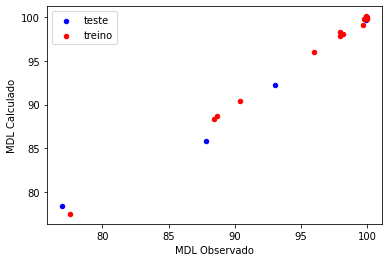

In [90]:
# expressa os dois dados em figura
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(adsorcao_obs_test,adsorcao_calc_test, s=20, c='b', marker="o", label='teste')
ax1.scatter(adsorcao_obs_train,adsorcao_calc_train, s=20, c='r', marker="o", label='treino')
plt.legend(loc='upper left')
plt.ylabel('MDL Calculado')
plt.xlabel('MDL Observado')
plt.show()

In [91]:
mse=mean_squared_error(adsorcao_obs_test,adsorcao_calc_test)
print("MSE teste=",mse)
R2=r2_score(adsorcao_obs_test,adsorcao_calc_test)
print("R^2 teste=",R2)

MSE teste= 1.7359071224388556
R^2 teste= 0.975177612643727


In [92]:
mse=mean_squared_error(adsorcao_obs_train,adsorcao_calc_train)
print("MSE treino=",mse)
R2=r2_score(adsorcao_obs_train,adsorcao_calc_train)
print("R^2 treino=",R2)

MSE treino= 0.027936304072176264
R^2 treino= 0.9992196242629642
